In [1]:
from tools import heatmap_eval, UMAP_eval, eval_classifier, vis_classifier
import pandas as pd
import numpy as np


plotnine is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
xgboost is already installed.
numpy is already installed.
scipy is already installed.


## BRCASubtype.csv, CVAE1-20, epoch 285, generated 500 each, quality evaluation

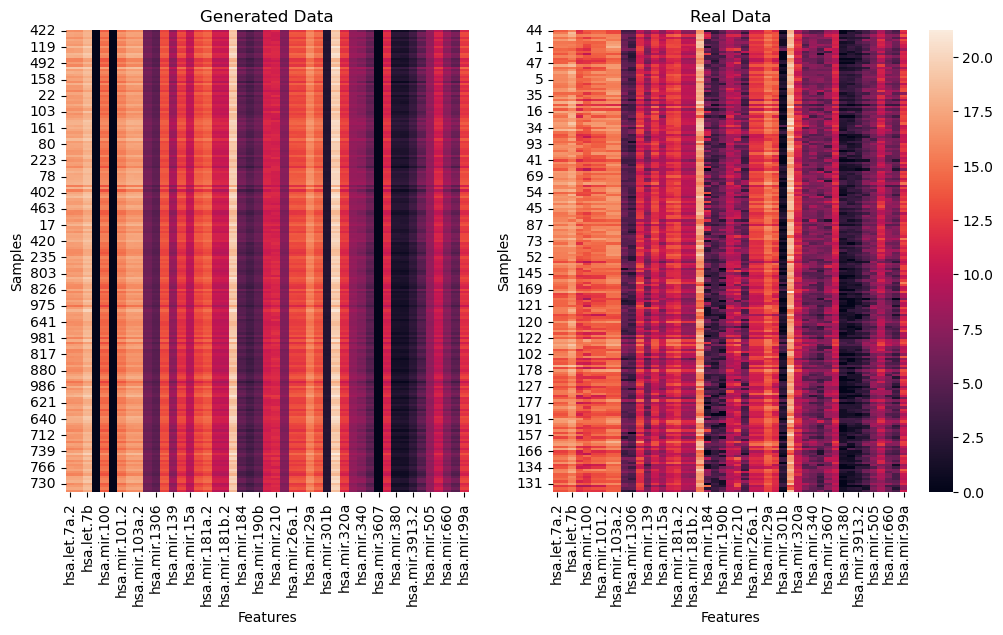

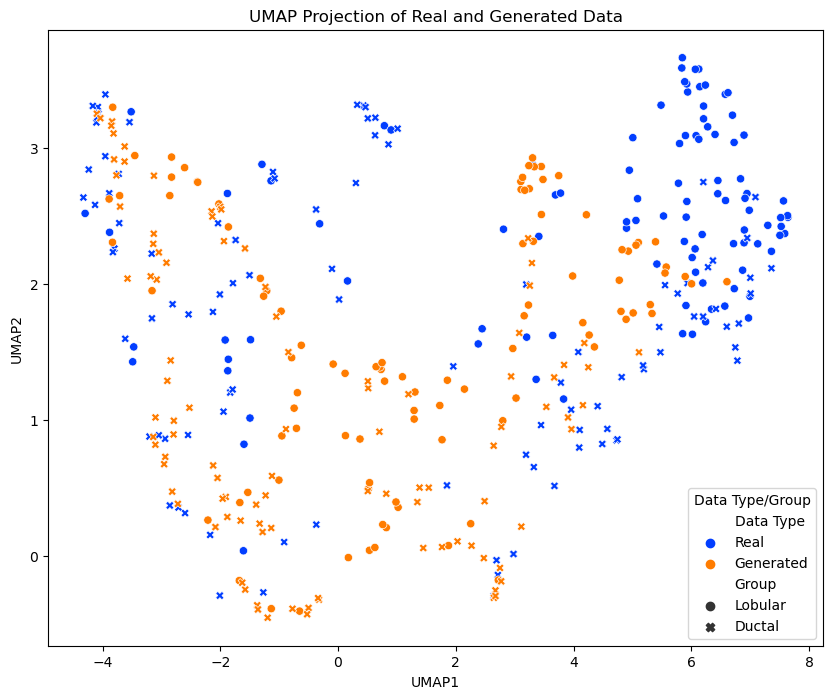

In [2]:
# Read in data
generated = pd.read_csv("Case/BRCASubtypeSel_train_epoch285_CVAE1-20_generated.csv", header=None)
real = pd.read_csv("Case/BRCASubtypeSel_test.csv",header = 0)

# Get sample groups
groups_real = pd.Series(np.where(real['groups'] == "Infiltrating Ductal Carcinoma", "Ductal", "Lobular"))

groups_generated = pd.Series(np.where(generated.iloc[:, -1] == 1, "Ductal", "Lobular"))

# Get pure data matrices
real = real.select_dtypes(include=[np.number])
real = np.log2(real + 1) 
generated = generated.iloc[:, :real.shape[1]]
generated.columns = real.columns

# Specify the total number of samples to select (k) from each dataset
k = 200

# Number of samples to select from each group
n_first_group_real = (groups_real == "Ductal").sum()
n_first_group_generated = (groups_generated == "Ductal").sum()

# Select k samples from the beginning and the end of the 'real' dataset
real_ind = np.random.choice(range(n_first_group_real), size=k// 2, replace=False).tolist() + \
           np.random.choice(range(len(real) - n_first_group_real, len(real)), size=k// 2, replace=False).tolist()

# Select k samples from the beginning and the end of the 'generated' dataset
generated_ind = np.random.choice(range(n_first_group_generated), size=k// 2, replace=False).tolist() + \
                np.random.choice(range(len(generated) - n_first_group_generated, len(generated)), size=k// 2, replace=False).tolist()

# Call evaluation functions
h_subtypes = heatmap_eval(dat_real = real.iloc[real_ind,], dat_generated = generated.iloc[generated_ind,])
p_umap_subtypes = UMAP_eval(dat_real = real.iloc[real_ind,],
                            dat_generated = generated.iloc[generated_ind,],
                            groups_real = groups_real.iloc[real_ind],
                            groups_generated = groups_generated.iloc[generated_ind],
                            random_state = 42,
                            legend_pos = "bottom")


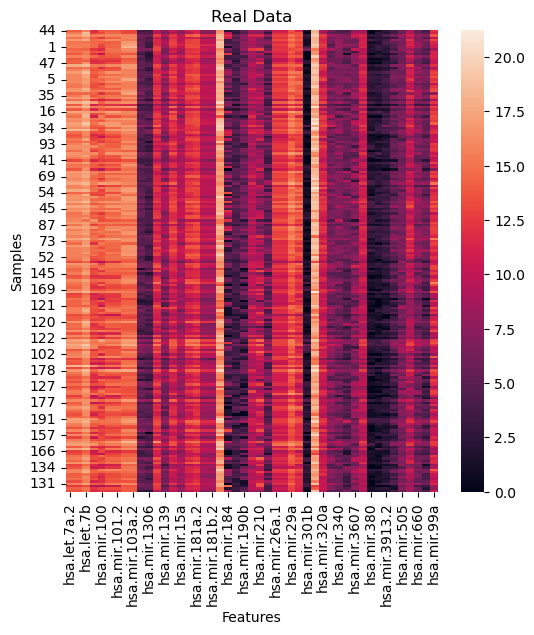

In [3]:
# If we only have the real samples...
heatmap_eval(dat_real = real.iloc[real_ind,], dat_generated = None)

## BRCASubtype classification accurary multiple classifier

In [ ]:
np.random.seed(333)

n_candidate = np.arange(20, 210, 10)  

n_target = np.array([230, 250, 270])  

In [ ]:
# Evaluate the classifier for generated data
metric_generated = eval_classifier(whole_generated=generated,
                                   whole_groups=groups_generated,
                                   n_candidate=n_candidate,
                                   n_draw=30, log=True)
# Save the results to csv file if necessary
metric_generated.to_csv('metric_generated.csv', index=False)

In [ ]:
# Evaluate the classifier for real data
metric_real = eval_classifier(whole_generated=real,
                              whole_groups=groups_real,
                              n_candidate=n_candidate,
                              n_draw=30, log=True)
# Save the results to csv file if necessary
metric_real.to_csv('metric_real.csv', index=False)

In [ ]:
# If we have already saved the results
metric_generated = pd.read_csv('metric_generated.csv',header = 0)
metric_real = pd.read_csv('metric_real.csv',header = 0)

In [ ]:
# Visualize the classifier performance
import matplotlib.pyplot as plt
p_acc = vis_classifier(metric_generated=metric_generated,
                       metric_real=metric_real,
                       n_target=n_target)

# Print the plot or result
print(p_acc)